# INDEX
[1. MNIST handdigit recognition on LeNet](#MNIST-handdigit-recognition "Goto MNIST handdigit recognition")<br>
[2. CIFAR-10](#CIFAR-10 "Goto CIFAR-10")<br>
[3. Cats vs Dogs](#Cats-vs-Dogs "Goto Cats vs Dogs")

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical, np_utils
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


# MNIST handdigit recognition
[INDEX](#INDEX "Goto INDEX")

## 1. Loading Data

In [2]:
# 1. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 2. Preprocess input data
# reshape to represent batch size, width, hight, depth(channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 3. One hot encoding on class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


## 2. Building & Compiling the CNN

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# apply various filters to get various layers of image
# 32: number of convolution layers or 2d metrices
# 3,3: size of filter
# activation functions: ['relu', 'tanh', 'LeakyReLU']
# rectifier(relu): max(x,0)
# hyperbolic tangent (tanh): (1-e^-2x)/(1+e^-2x)
classifier.add(Conv2D(20, (5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

# Step 2 - Pooling
# Max Pooling - get 2x2 matrix to filter image by max value
# usually take size 2x2 so that much information is not lost
# in this way assume we have n number of 2d matrix then each matrix represent one specific feature of image
classifier.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

# add another conv layer
classifier.add(Conv2D(50, (5, 5), padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

# Step 3 - Flattening
# convert into a single dimensional array where each element contains a feature of image
classifier.add(Flatten())

# Step 4 - Full connection
# fully connected layer or hidden layer
classifier.add(Dense(units=500, activation = 'relu'))

# Step 5 - Ouput Layer
# activation functions: [regression: 'linear', binary classification: 'sigmoid', multiclass: 'softmax']
# sigmoid: 1/(1+e^-x)
# linear: same output
# softmax: converts o/p into a probability distribution for mutliclass problem
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
# optimizers: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# loss functions: [regression: ['mse', 'mae', 'logloss'], binary_classification: 'binary_crossentropy', multi_class: 'categorical_crossentropy']
# metrics: ['accuracy']
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total para

## 3. Fitting the CNN to the images

In [5]:
# batch_size: number of inputs after which weights will be updated
batch_size = 128

# steps_per_epoch: number of images in training set 
history = classifier.fit(X_train,
                         Y_train,
                         batch_size = batch_size,
                         epochs = 10,
                         validation_data = (X_test, Y_test))

W0724 16:08:05.652485 16792 deprecation.py:323] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 16:08:05.707470 16792 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0724 16:08:05.793396 16792 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0724 16:08:05.862544 16792 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


W0724 16:08:06.057519 16792 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0724 16:08:06.161459 16792 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 63s 1ms/step - loss: 0.1581 - acc: 0.9532 - val_loss: 0.0504 - val_acc: 0.9842
Epoch 2/10
60000/60000 [==============================] - 60s 996us/step - loss: 0.0433 - acc: 0.9867 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 3/10
60000/60000 [==============================] - 53s 881us/step - loss: 0.0297 - acc: 0.9907 - val_loss: 0.0305 - val_acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 53s 879us/step - loss: 0.0208 - acc: 0.9932 - val_loss: 0.0229 - val_acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 59s 980us/step - loss: 0.0159 - acc: 0.9951 - val_loss: 0.0259 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 58s 968us/step - loss: 0.0137 - acc: 0.9953 - val_loss: 0.0365 - val_acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 58s 969us/step - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0251 - val_acc: 0.9920
Epoch 8/10
60000/60000 [================

## 4. Saving/Loading Model

In [8]:
# saving model
classifier.save("mnist.h5")

# load model
classifier = load_model("mnist.h5")

## 5. Plotting loss and accuracy

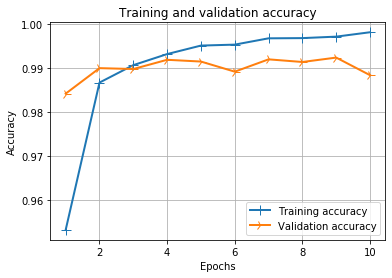

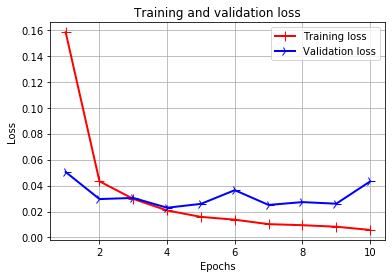

In [6]:
# get dictionary of history data
history_data = history.history

train_accuracy = history_data['acc']
val_accuracy = history_data['val_acc']
train_loss = history_data['loss']
val_loss = history_data['val_loss']
epochs = range(1, len(train_accuracy)+1)

line1 = plt.plot(epochs, train_accuracy, label='Training accuracy')
line2 = plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

line1 = plt.plot(epochs, train_loss, 'r', label='Training loss')
line2 = plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## 6. Evaluating Model

In [7]:
# evaluate performance on test data
test_eval = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Confusion matrix and classification report
# support: total records of that class
y_pred = classifier.predict(X_test)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))

Test loss: 0.04314653067803629
Test accuracy: 0.9884
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    1    0    0    0    0]
 [   0 1126    2    2    0    0    0    3    2    0]
 [   0    0 1030    0    0    0    0    2    0    0]
 [   1    0    2 1005    0   

## 9. Check misclassified data

Indices of misclassified data in y_test:
 [ 247  340  445  551  582  619  659  684  716  846  938  947 1014 1039
 1182 1226 1232 1242 1247 1319 1364 1393 1444 1530 1553 1559 1709 1878
 1901 2018 2035 2070 2118 2129 2130 2135 2182 2293 2343 2380 2578 2597
 2607 2654 2771 2896 2927 2939 2995 3023 3060 3422 3441 3520 3762 3767
 3794 3808 3853 3926 3939 4078 4163 4176 4201 4256 4265 4284 4360 4380
 4443 4497 4507 4536 4571 4620 4731 4740 4807 4823 4860 5201 5246 5654
 5655 5749 5937 6071 6081 6091 6112 6157 6166 6172 6532 6555 6571 6572
 6625 7459 8326 8408 8527 9009 9015 9019 9024 9540 9587 9642 9679 9692
 9729 9770 9792 9856]


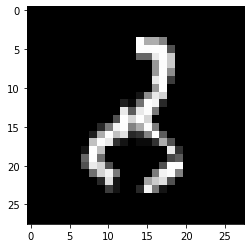

Predicted value: 2
Actual value: 8


In [9]:
# get indices of misclassified data
difference_in_result= np.absolute(np.argmax(y_pred, axis=1)-y_test)
misclassified_data = np.where(difference_in_result>0)
print("Indices of misclassified data in y_test:\n", misclassified_data[0])

# Display misclassified data
index = 582
plt.imshow(X_test[index][:,:,0], cmap='gray');
plt.show()
print('Predicted value:', np.argmax(classifier.predict(X_test[index].reshape(1, 28, 28, 1))))
print('Actual value:', y_test[index])

## 8. Making prediction

Actual Value: 3
Prediction: 3


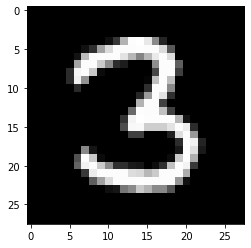

In [10]:
# predict
index = 849
plt.imshow(X_test[index][:,:,0], cmap='gray')
result = classifier.predict(X_test[index].reshape(1, 28, 28, 1))
print('Actual Value:', np.argmax(Y_test[index]))
print('Prediction:', np.argmax(result))

## 9. Displaying model Visually

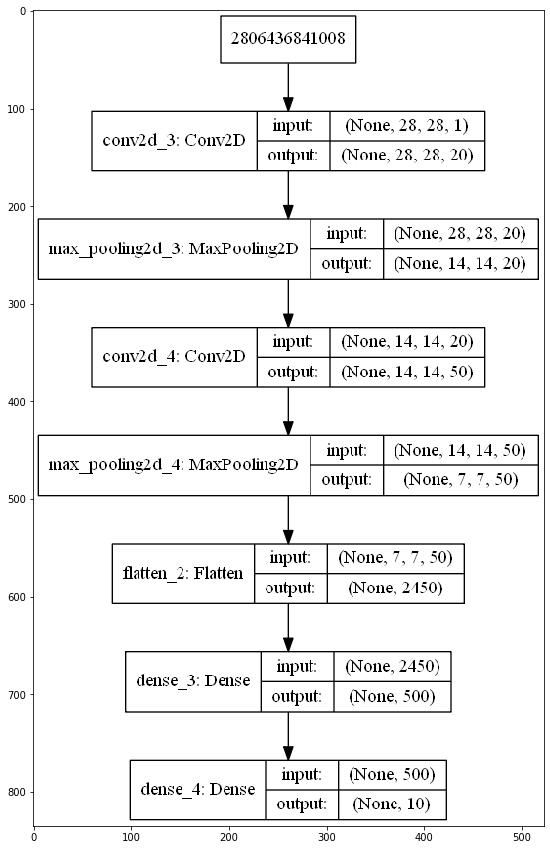

In [11]:
from keras.utils.vis_utils import plot_model

# generate the plot
plot_model(classifier, to_file='mnist.png', show_shapes=True, show_layer_names=True)

# show the plot
img = plt.imread('mnist.png')
plt.figure(figsize=(30,15))
plt.imshow(img)

# CIFAR-10
[INDEX](#INDEX "Goto INDEX")

In [9]:
import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical, np_utils
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import cifar10
from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

## 1. Loading Data

In [105]:
# 1. Load pre-shuffled cifar-10 data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
# 2. Preprocess input data
# normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 3. One hot encoding on class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## 2. Building & Compiling the CNN

In [15]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# apply various filters to get various layers of image
# 32: number of convolution layers or 2d metrices
# 3,3: size of filter
# padding: 'same', results in padding the input such that the output has same dimension as input
# activation functions: ['relu', 'tanh', 'LeakyReLU']
# rectifier(relu): max(x,0)
# hyperbolic tangent (tanh): (1-e^-2x)/(1+e^-2x)
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
classifier.add(Activation('relu'))
classifier.add(Conv2D(32, (3, 3)))
classifier.add(Activation('relu'))

# Step 2 - Pooling
# Max Pooling - get 2x2 matrix to filter image by max value
# usually take size 2x2 so that much information is not lost
# in this way assume we have n number of 2d matrix then each matrix represent one specific feature of image
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

# Step 3 - Adding more convolution layers
classifier.add(Conv2D(64, (3, 3), padding='same'))
classifier.add(Activation('relu'))
classifier.add(Conv2D(64, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

# Step 4 - Flattening
# convert into a single dimensional array where each element contains a feature of image
classifier.add(Flatten())

# Step 5 - Full connection
# fully connected layer or hidden layer
classifier.add(Dense(512))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

# Step 6 - Ouput Layer
# activation functions: [regression: 'linear', binary classification: 'sigmoid', multiclass: 'softmax']
# sigmoid: 1/(1+e^-x)
# linear: same output
# softmax: converts o/p into a probability distribution for mutliclass problem
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

# Compiling the CNN
# optimizers: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# loss functions: [regression: ['mse', 'mae', 'logloss'], binary_classification: 'binary_crossentropy', multi_class: 'categorical_crossentropy']
# metrics: ['accuracy', 'precision', 'mse', 'mae']
optimizer = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

## 3. Fitting the CNN to the images

In [16]:
# batch_size: number of inputs after which weights will be updated
batch_size = 32

# steps_per_epoch: number of images in training set 
history = classifier.fit(X_train,
                         Y_train,
                         batch_size = batch_size,
                         epochs = 10,
                         validation_data = (X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 185s 4ms/step - loss: 1.8003 - acc: 0.3370 - val_loss: 1.5603 - val_acc: 0.4373
Epoch 2/10
50000/50000 [==============================] - 168s 3ms/step - loss: 1.5013 - acc: 0.4552 - val_loss: 1.3635 - val_acc: 0.5030
Epoch 3/10
50000/50000 [==============================] - 167s 3ms/step - loss: 1.3590 - acc: 0.5140 - val_loss: 1.2475 - val_acc: 0.5600
Epoch 4/10
50000/50000 [==============================] - 162s 3ms/step - loss: 1.2525 - acc: 0.5558 - val_loss: 1.1494 - val_acc: 0.5945
Epoch 5/10
50000/50000 [==============================] - 157s 3ms/step - loss: 1.1713 - acc: 0.5874 - val_loss: 1.1274 - val_acc: 0.5973
Epoch 6/10
50000/50000 [==============================] - 157s 3ms/step - loss: 1.0962 - acc: 0.6121 - val_loss: 1.0667 - val_acc: 0.6311
Epoch 7/10
50000/50000 [==============================] - 157s 3ms/step - loss: 1.0417 - acc: 0.6337 - val_loss: 1.0056 - 

## 4. Saving/Loading Model

In [104]:
# saving model
classifier.save("cifar-10.h5")

# load model
classifier = load_model("cifar-10.h5")

## 5. Plotting loss and accuracy

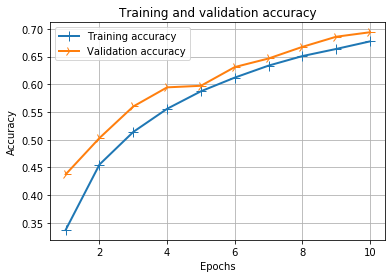

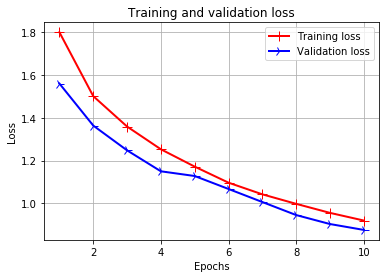

In [18]:
# get dictionary of history data
history_data = history.history

train_accuracy = history_data['acc']
val_accuracy = history_data['val_acc']
train_loss = history_data['loss']
val_loss = history_data['val_loss']
epochs = range(1, len(train_accuracy)+1)

line1 = plt.plot(epochs, train_accuracy, label='Training accuracy')
line2 = plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

line1 = plt.plot(epochs, train_loss, 'r', label='Training loss')
line2 = plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## 6. Evaluating Model

In [118]:
# evaluate performance on test data
test_eval = classifier.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Confusion matrix and classification report
# support: total no. of records of a particular class
y_pred = classifier.predict(X_test)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.78      0.86      0.82      1000
           2       0.51      0.65      0.57      1000
           3       0.62      0.36      0.46      1000
           4       0.61      0.64      0.62      1000
           5       0.62      0.59      0.60      1000
           6       0.74      0.78      0.76      1000
           7       0.68      0.79      0.73      1000
           8       0.88      0.76      0.81      1000
           9       0.85      0.74      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

[[779  26  79   7  15   4   9  21  40  20]
 [ 28 865  10   5   4   4  11   2  12  59]
 [ 53   5 650  24 103  59  56  36   9   5]
 [ 29  11 143 363  95 183  90  62  10  14]
 [ 30   5 107  23 636  27  53 111   6   2]
 [ 19   7 112  95  58 586 

## 7. Making prediction

Actual Value: deer
Prediction: deer


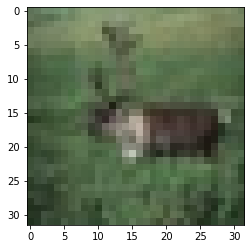

In [21]:
# create class map
class_map = {'0':'airplane', 
             '1':'automobile', 
             '2':'bird', 
             '3':'cat', 
             '4':'deer', 
             '5':'dog', 
             '6':'frog', 
             '7':'horse', 
             '8':'ship', 
             '9':'truck'}

# predict
index = 849
plt.imshow(X_test[index])
result = classifier.predict(X_test[index].reshape(1, 32, 32, 3))
print('Actual Value:', class_map[str(np.argmax(Y_test[index]))])
print('Prediction:', class_map[str(np.argmax(result))])

## 8. Displaying model Visually

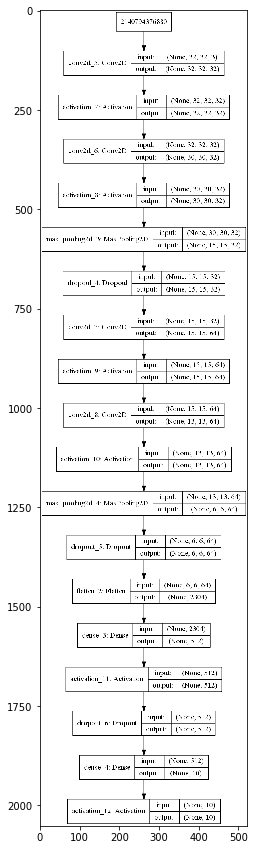

In [22]:
from keras.utils.vis_utils import plot_model

# generate the plot
plot_model(classifier, to_file='cifar10.png', show_shapes=True, show_layer_names=True)

# show the plot
img = plt.imread('cifar10.png')
plt.figure(figsize=(30,15))
plt.imshow(img)

# Cats vs Dogs
[INDEX](#INDEX "Goto INDEX")

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import keras
from keras.utils import to_categorical, np_utils
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model
from keras.preprocessing import image

import os, shutil
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


## 1. Loading Data & Data Generator

In [2]:
# 1. Load the file names from the images folder
images_names = os.listdir('images')

# 2. Split data into dog and cat
cat_images = [i for i in images_names if 'cat' in i]
dog_images = [i for i in images_names if 'dog' in i]

# 3. Split cat and dog data in train and validations sets and save in respective dirs
train_dir_dog = 'train/dog'
os.makedirs(train_dir_dog)
train_dir_cat = 'train/cat'
os.makedirs(train_dir_cat)
val_dir_dog = 'val/dog'
os.makedirs(val_dir_dog)
val_dir_cat = 'val/cat'
os.makedirs(val_dir_cat)
for i in range(1300):
    shutil.copy(os.path.join('images', dog_images[i]), train_dir_dog)
    shutil.copy(os.path.join('images', cat_images[i]), train_dir_cat)

for i in range(1300, len(cat_images)):
    shutil.copy(os.path.join('images', dog_images[i]), val_dir_dog)
    shutil.copy(os.path.join('images', cat_images[i]), val_dir_cat)

# 4. Define image data generators
# perform image augmentation to save model from overfitting the training data
# augmentation will create various batches of images & will apply various transformations on images like flipping
# hence providing the overall more training data without adding anymore images
# shear_range & zoom_range are to define how much randomization we want to apply on data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# target size: same as input shape in classifier as this will be the input to classifier
# batch_size: number of inputs after which weights will be updated
# class_mode: ['binary', 'categorical']
training_set = train_datagen.flow_from_directory('train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_set = test_datagen.flow_from_directory('val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2600 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


## 2. Building & Compiling the CNN

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# apply various filters to get various layers of image
# 32: number of convolution layers or 2d metrices
# 3,3: size of filter
# padding: 'same', results in padding the input such that the output has same dimension as input
# activation functions: ['relu', 'tanh', 'LeakyReLU']
# rectifier(relu): max(x,0)
# hyperbolic tangent (tanh): (1-e^-2x)/(1+e^-2x)
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)))
classifier.add(Activation('relu'))

# Step 2 - Pooling
# Max Pooling - get 2x2 matrix to filter image by max value
# usually take size 2x2 so that much information is not lost
# in this way assume we have n number of 2d matrix then each matrix represent one specific feature of image
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

# Step 3 - Adding more convolution layers
classifier.add(Conv2D(32, (3, 3), padding='same'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

# Step 4 - Flattening
# convert into a single dimensional array where each element contains a feature of image
classifier.add(Flatten())

# Step 5 - Full connection
# fully connected layer or hidden layer
classifier.add(Dense(128))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

# Step 6 - Ouput Layer
# activation functions: [regression: 'linear', binary classification: 'sigmoid', multiclass: 'softmax']
# sigmoid: 1/(1+e^-x)
# linear: same output
# softmax: converts o/p into a probability distribution for mutliclass problem
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

# Compiling the CNN
# optimizers: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# loss functions: [regression: ['mse', 'mae', 'logloss'], binary_classification: 'binary_crossentropy', multi_class: 'categorical_crossentropy']
# metrics: ['accuracy', 'precision', 'mse', 'mae']
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

## 3. Fitting the CNN to the images

In [5]:
# batch_size: number of inputs after which weights will be updated
batch_size = 32

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 2600//batch_size,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 402//batch_size)

W0724 15:04:56.697126 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0724 15:04:56.785912 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0724 15:04:56.871690 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



Epoch 1/25


W0724 15:04:59.973734 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0724 15:04:59.975729 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0724 15:05:00.544431 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0724 15:05:00.545428 21584 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable

81/81 [==============================] - 72s 884ms/step - loss: 0.6897 - acc: 0.5309 - val_loss: 0.6717 - val_acc: 0.5312
Epoch 2/25
81/81 [==============================] - 15s 182ms/step - loss: 0.6619 - acc: 0.5938 - val_loss: 0.6402 - val_acc: 0.6378
Epoch 3/25
81/81 [==============================] - 15s 184ms/step - loss: 0.6393 - acc: 0.6331 - val_loss: 0.6102 - val_acc: 0.6676
Epoch 4/25
81/81 [==============================] - 16s 195ms/step - loss: 0.6149 - acc: 0.6706 - val_loss: 0.6118 - val_acc: 0.6838
Epoch 5/25
81/81 [==============================] - 15s 186ms/step - loss: 0.6012 - acc: 0.6844 - val_loss: 0.7120 - val_acc: 0.5703
Epoch 6/25
81/81 [==============================] - 20s 248ms/step - loss: 0.5923 - acc: 0.6891 - val_loss: 0.5448 - val_acc: 0.7162
Epoch 7/25
81/81 [==============================] - 18s 224ms/step - loss: 0.5817 - acc: 0.7049 - val_loss: 0.5670 - val_acc: 0.7270
Epoch 8/25
81/81 [==============================] - 15s 186ms/step - loss: 0.568

## 4. Saving/Loading Model

In [7]:
# saving model
classifier.save("cat_vs_dog.h5")

# load model
classifier = load_model("cat_vs_dog.h5")

## 5. Plotting loss and accuracy

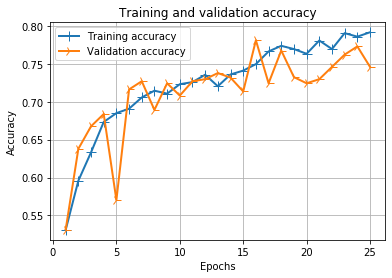

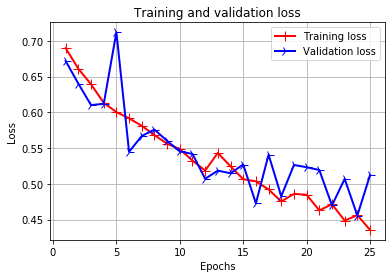

In [8]:
# get dictionary of history data
history_data = history.history

train_accuracy = history_data['acc']
val_accuracy = history_data['val_acc']
train_loss = history_data['loss']
val_loss = history_data['val_loss']
epochs = range(1, len(train_accuracy)+1)

line1 = plt.plot(epochs, train_accuracy, label='Training accuracy')
line2 = plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

line1 = plt.plot(epochs, train_loss, 'r', label='Training loss')
line2 = plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## 6. Evaluating Model

In [14]:
# evaluate performance on test data
test_eval = classifier.evaluate_generator(test_set, steps=402//batch_size, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


12/12 [==============================] - 1s 83ms/step
Test loss: 0.5376357838914201
Test accuracy: 0.7162162171827781


## 7. Making prediction

{'cat': 0, 'dog': 1}


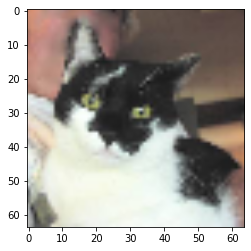

cat: 0.5882969


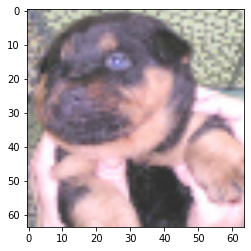

dog: 0.9871898


In [16]:
index = 1500
# load image
test_image = image.load_img('val/cat/'+cat_images[index], target_size=(64, 64))
plt.imshow(test_image, interpolation='bilinear')
# convert into array
# dimenstion = 64, 64, 3
test_image = image.img_to_array(test_image)
# add batch size as 4th dimension
test_image = np.expand_dims(test_image, axis = 0)
# predict on rescaled image
result = classifier.predict(test_image/255)
# get class attributes
print(training_set.class_indices)
plt.show()
if result[0][0]>0.6:
    print('dog:', result[0][0])
else:
    print('cat:', result[0][0])
    
# load image
test_image = image.load_img('val/dog/'+dog_images[index], target_size=(64, 64))
plt.imshow(test_image, interpolation='bilinear')
plt.show()
# convert into array
# dimenstion = 64, 64, 3
test_image = image.img_to_array(test_image)
# add batch size as 4th dimension
test_image = np.expand_dims(test_image, axis = 0)
# predict on rescaled image
result = classifier.predict(test_image/255)
if result[0][0]>0.6:
    print('dog:', result[0][0])
else:
    print('cat:', result[0][0])


## 8. Displaying model Visually

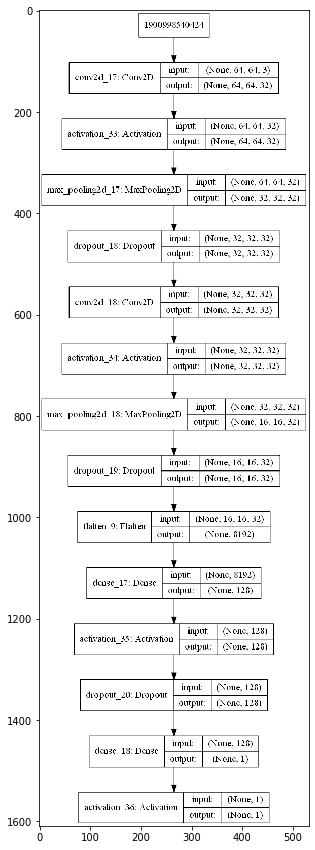

In [95]:
from keras.utils.vis_utils import plot_model

# generate the plot
plot_model(classifier, to_file='cat_vs_dog.png', show_shapes=True, show_layer_names=True)

# show the plot
img = plt.imread('cat_vs_dog.png')
plt.figure(figsize=(30,15))
plt.imshow(img)